In [1]:
import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
XRANGE = (0, 20)
YRANGE = (-7.5, 12)

In [3]:
df = pd.read_csv("../data/processed/labeled-dataset.csv")

In [4]:
def _to_hex(arr):
    return [matplotlib.colors.to_hex(c) for c in arr]

In [5]:
def points(
    df,
    num_topics,
    labels_type="labels",
    width=800,
    height=800,
):
    point_size = 100.0 / np.sqrt(df.shape[0])

    dpi = plt.rcParams["figure.dpi"]
    fig = plt.figure(figsize=(width / dpi, height / dpi))
    ax = fig.add_subplot(111)

    _label = labels_type
    unique_labels = df[_label].unique()
    num_labels = unique_labels.shape[0]
    color_key = _to_hex(plt.get_cmap("Spectral")(np.linspace(0, 1, num_labels)))
    legend_elements = [
        Patch(facecolor=color_key[i], label=k + 1 if isinstance(k, int) else k)
        for i, k in enumerate(sorted(unique_labels))
    ]

    new_color_key = {
        k: matplotlib.colors.to_hex(color_key[i])
        for i, k in enumerate(sorted(unique_labels))
    }
    colors = df[_label].map(new_color_key)
    ax.scatter(df["x"], df["y"], s=point_size, c=colors)
    
    plt.xlim(XRANGE)
    plt.ylim(YRANGE)
    ax.margins(x=0, y=-0.25)
    ax.set_title(f"Reduced 2D embeddings: {num_topics} labeled topics")
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set(xticks=[], yticks=[])

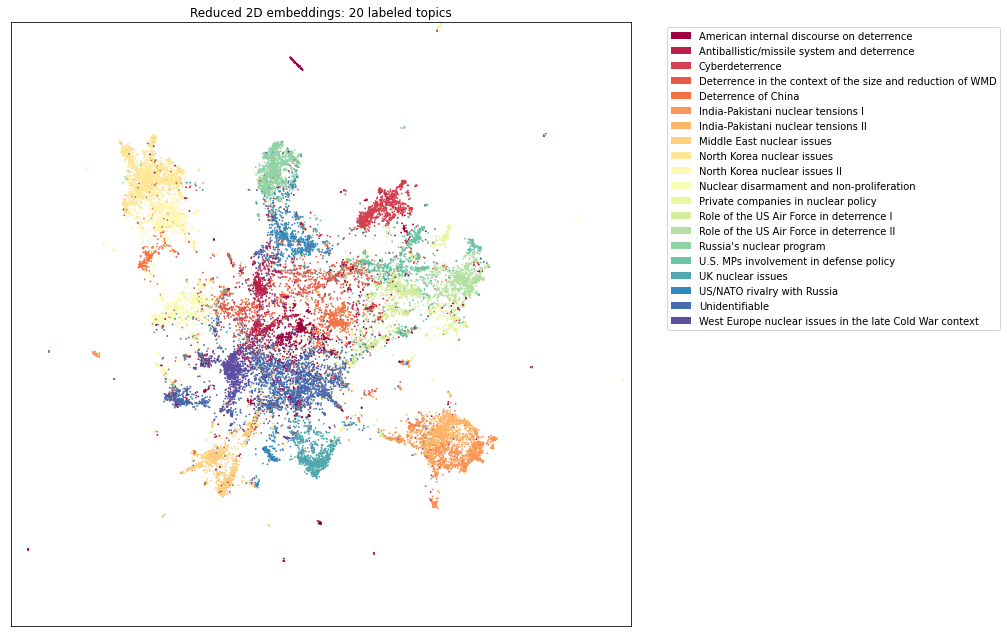

In [7]:
points(df, len(df["labels"].unique()))
plt.savefig(
    f"./../reports/figures/final-static-20-topics.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)